# Preparing Predicting Data & Correlation Analysis

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import prediction_prep as prep

import warnings
warnings.filterwarnings('ignore')

sns.set_style("white")
sns.set(font_scale=1.2) 

# Add in grouping for new things that PX will add

## 1. Prepare Prediction Data

### 1.1 Ellyn USE THESE CELLS TO GET LAG DF

In [2]:
#DV: DIR (classf), SD (reg), Close (reg) 
# READ IN ALL DATA
comments = pd.read_csv('comments_preprocessed_assigned.csv')
sentiment = pd.read_csv('df_pred_id_body.csv')
fin_data = pd.read_csv('AMC_2021.csv')

In [3]:
# Call function to get regression df
df = prep.get_regression_df(ticker_name = 'amc', #
                           comments = comments, 
                           fin_data = fin_data,
                           sentiment = sentiment)
df.head()

There are 14215 nulls in sentiment column.
Dropping nulls.


,date,comments_neutral,comments_positive,comment_count,pct_pos_comments,is_meme,comments_neutral_rollsum_3D,comments_neutral_rollmean_3D,comments_neutral_3D_pctchg,comments_positive_rollsum_3D,...,Dir,2Dir,3Dir,4Dir,5Dir,6Dir,7Dir,SD,day_of_week,SD_log
0,2021-01-01,34.0,8.0,42.0,19.047574,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
1,2021-01-02,7.0,1.0,8.0,12.499844,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
2,2021-01-03,3.0,1.0,4.0,24.999375,0,44.0,14.666667,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
3,2021-01-04,0.0,0.0,0.0,0.000000,0,10.0,3.333333,-100.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.788105,0,-0.238123
4,2021-01-05,0.0,0.0,0.0,0.000000,0,3.0,1.000000,-100.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.815720,1,-0.203684


In [14]:
## DAILY%CHANGE ##
dep_var = ['Daily%Change'] # SET YOUR DEP VAR HERE AND REMOVE IT FROM fin_vars IF NOT YOU WILL GET AN ERROR
other_var = ['day_of_week']
sentiment_vars = [i for i in df.columns if 'comment' in i] +['is_meme']
fin_vars = list(set(df.columns) - set(dep_var+other_var+sentiment_vars+['date'])) # catch all
print('Check that these are all just independent financial vars: '+str(fin_vars))
shift = 1

pred_lag = prep.lag_pred_df(df = df,
                       dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)

pred_lag.head()

Check that these are all just independent financial vars: ['Volume', 'Low', '2Dir', '3Dir', 'Close', '6D%Change', 'Dir', '4D%Change', '5Dir', 'Open', '7D%Change', '3D%Change', 'SD', 'High', '7Dir', '6Dir', '5D%Change', '2D%Change', 'SD_log', '4Dir']
Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250


,Daily%Change,day_of_week,comments_neutral(t-1),comments_positive(t-1),comment_count(t-1),pct_pos_comments(t-1),comments_neutral_rollsum_3D(t-1),comments_neutral_rollmean_3D(t-1),comments_neutral_3D_pctchg(t-1),comments_positive_rollsum_3D(t-1),...,3D%Change(t-1),SD(t-1),High(t-1),7Dir(t-1),6Dir(t-1),5D%Change(t-1),2D%Change(t-1),SD_log(t-1),4Dir(t-1),Daily%Change(t-1)
0,-5.188675,0,3.0,1.0,4.0,24.999375,44.0,14.666667,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.492536,1,0.0,0.0,0.0,0.000000,10.0,3.333333,-100.0,2.0,...,NaN,0.788105,2.20,0.0,0.0,NaN,NaN,-0.238123,0.0,-5.188675
2,1.515150,2,0.0,0.0,0.0,0.000000,3.0,1.000000,-100.0,1.0,...,NaN,0.815720,2.03,0.0,0.0,NaN,-6.603768,-0.203684,0.0,-1.492536
3,1.990048,3,0.0,0.0,0.0,0.000000,0.0,0.000000,-100.0,0.0,...,-5.188675,2.505572,2.23,0.0,0.0,NaN,0.000000,0.918517,0.0,1.515150
4,4.390251,4,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,...,1.990048,1.405905,2.11,0.0,0.0,NaN,3.535350,0.340681,0.0,1.990048


In [15]:
## SD ##
## DAILY%CHANGE ##
dep_var = ['SD_log'] # SET YOUR DEP VAR HERE AND REMOVE IT FROM fin_vars IF NOT YOU WILL GET AN ERROR
other_var = ['day_of_week']
sentiment_vars = [i for i in df.columns if 'comment' in i] +['is_meme']
fin_vars = list(set(df.columns) - set(dep_var+other_var+sentiment_vars+['date'])) # catch all
print('Check that these are all just independent financial vars: '+str(fin_vars))
shift = 1

pred_lag = prep.lag_pred_df(df = df,
                       dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)

pred_lag.head()

Check that these are all just independent financial vars: ['Daily%Change', 'Volume', 'Low', '3Dir', '2Dir', 'Close', '6D%Change', 'Dir', '4D%Change', '5Dir', 'Open', '7D%Change', '3D%Change', 'SD', 'High', '7Dir', '6Dir', '5D%Change', '2D%Change', '4Dir']
Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250


,SD_log,day_of_week,comments_neutral(t-1),comments_positive(t-1),comment_count(t-1),pct_pos_comments(t-1),comments_neutral_rollsum_3D(t-1),comments_neutral_rollmean_3D(t-1),comments_neutral_3D_pctchg(t-1),comments_positive_rollsum_3D(t-1),...,7D%Change(t-1),3D%Change(t-1),SD(t-1),High(t-1),7Dir(t-1),6Dir(t-1),5D%Change(t-1),2D%Change(t-1),4Dir(t-1),SD_log(t-1)
0,-0.238123,0,3.0,1.0,4.0,24.999375,44.0,14.666667,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.203684,1,0.0,0.0,0.0,0.000000,10.0,3.333333,-100.0,2.0,...,NaN,NaN,0.788105,2.20,0.0,0.0,NaN,NaN,0.0,-0.238123
2,0.918517,2,0.0,0.0,0.0,0.000000,3.0,1.000000,-100.0,1.0,...,NaN,NaN,0.815720,2.03,0.0,0.0,NaN,-6.603768,0.0,-0.203684
3,0.340681,3,0.0,0.0,0.0,0.000000,0.0,0.000000,-100.0,0.0,...,NaN,-5.188675,2.505572,2.23,0.0,0.0,NaN,0.000000,0.0,0.918517
4,0.345258,4,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,...,NaN,1.990048,1.405905,2.11,0.0,0.0,NaN,3.535350,0.0,0.340681


In [16]:
## CLOSE PRICE ##
dep_var = ['Close'] # SET YOUR DEP VAR HERE AND REMOVE IT FROM fin_vars IF NOT YOU WILL GET AN ERROR
other_var = ['day_of_week']
sentiment_vars = [i for i in df.columns if 'comment' in i] +['is_meme']
fin_vars = list(set(df.columns) - set(dep_var+other_var+sentiment_vars+['date'])) # catch all
print('Check that these are all just independent financial vars: '+str(fin_vars))
shift = 1

pred_lag = prep.lag_pred_df(df = df,
                       dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)

pred_lag.head()

Check that these are all just independent financial vars: ['Daily%Change', 'Volume', 'Low', '2Dir', '3Dir', '6D%Change', 'Dir', '4D%Change', '5Dir', 'Open', '7D%Change', '3D%Change', 'SD', 'High', '7Dir', '6Dir', '5D%Change', '2D%Change', 'SD_log', '4Dir']
Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250


,Close,day_of_week,comments_neutral(t-1),comments_positive(t-1),comment_count(t-1),pct_pos_comments(t-1),comments_neutral_rollsum_3D(t-1),comments_neutral_rollmean_3D(t-1),comments_neutral_3D_pctchg(t-1),comments_positive_rollsum_3D(t-1),...,3D%Change(t-1),SD(t-1),High(t-1),7Dir(t-1),6Dir(t-1),5D%Change(t-1),2D%Change(t-1),SD_log(t-1),4Dir(t-1),Close(t-1)
0,2.01,0,3.0,1.0,4.0,24.999375,44.0,14.666667,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.98,1,0.0,0.0,0.0,0.000000,10.0,3.333333,-100.0,2.0,...,NaN,0.788105,2.20,0.0,0.0,NaN,NaN,-0.238123,0.0,2.01
2,2.01,2,0.0,0.0,0.0,0.000000,3.0,1.000000,-100.0,1.0,...,NaN,0.815720,2.03,0.0,0.0,NaN,-6.603768,-0.203684,0.0,1.98
3,2.05,3,0.0,0.0,0.0,0.000000,0.0,0.000000,-100.0,0.0,...,-5.188675,2.505572,2.23,0.0,0.0,NaN,0.000000,0.918517,0.0,2.01
4,2.14,4,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,...,1.990048,1.405905,2.11,0.0,0.0,NaN,3.535350,0.340681,0.0,2.05


## 2. Correlation and Time Series Tests

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. 

If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

### 2.1 Check Distributions of variables

In [176]:
# # Check meme period graph
# ticker = 'amc'

# ax = sns.lineplot(x = 'date', y = 'comment_count', data = df, legend='auto')
# ax2 = ax.twinx()
# sns.lineplot(x = 'date', y = 'is_meme', data = df, legend='auto', color = 'red', linestyle="dashed", linewidth = 0.8)
# ax.figure.legend()
# plt.ylim(0,2)
# plt.show()

In [39]:
ax2.get_label()

''

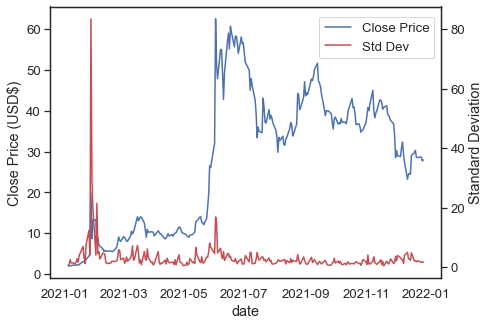

In [57]:
sns.set_style("white")
fig = plt.figure(figsize = (7,5))
ax = sns.lineplot(x = 'date', y = 'Close', data = df)
plt.ylabel('Close Price (USD$)')
ax2 = plt.twinx()
sns.lineplot(x = 'date', y = 'SD', data = df, ax=ax2, color="r")
plt.ylabel('Standard Deviation')
fig.legend(labels = ['Close Price', 'Std Dev'],
          bbox_to_anchor=(0.9, 0.87))
plt.show()

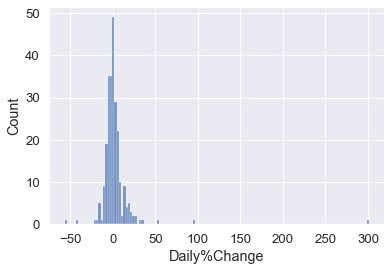

In [21]:
# Check distribution of y variable
sns.histplot(df['Daily%Change'])
plt.show()

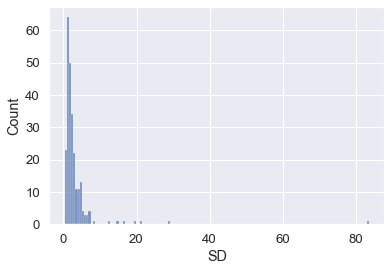

In [22]:
# Check distribution of y variable
# Need to log transform SD
sns.histplot(df['SD'])
plt.show()

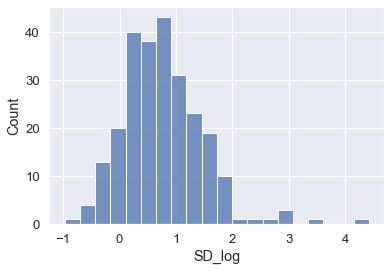

In [23]:
sns.histplot(df['SD_log'])
plt.show()

0.0    128
1.0    122
Name: Dir, dtype: int64


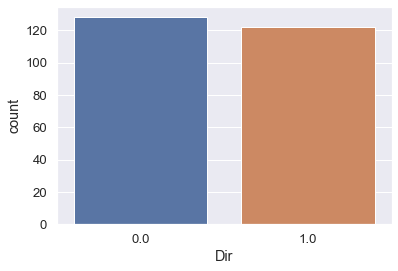

In [24]:
sns.countplot(df['Dir'])
print(df['Dir'].value_counts())
plt.show()

### 2.1  Granger Causality Test

In [89]:
from statsmodels.tsa.stattools import grangercausalitytests

In [157]:
chg_test = df[['Daily%Change', 'comment_count_mean_rolling_3D']].dropna()
grangercausalitytests(chg_test, maxlag = [1, 2, 3, 4, 5, 6, 7])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8853  , p=0.3477  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.8961  , p=0.3438  , df=1
likelihood ratio test: chi2=0.8945  , p=0.3443  , df=1
parameter F test:         F=0.8853  , p=0.3477  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7171  , p=0.0681  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=5.5460  , p=0.0625  , df=2
likelihood ratio test: chi2=5.4849  , p=0.0644  , df=2
parameter F test:         F=2.7171  , p=0.0681  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6946  , p=0.0125  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=11.4070 , p=0.0097  , df=3
likelihood ratio test: chi2=11.1514 , p=0.0109  , df=3
parameter F test:         F=3.6946  , p=0.0125  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6592  , p=0.0335  

{1: ({'ssr_ftest': (0.8852803160787555, 0.34768251088446533, 246.0, 1),
   'ssr_chi2test': (0.89607641749435, 0.3438359509588188, 1),
   'lrtest': (0.8944679200262726, 0.344269409041697, 1),
   'params_ftest': (0.8852803160785981, 0.3476825108845102, 246.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.717096341194649, 0.06807394780501974, 243.0, 2),
   'ssr_chi2test': (5.546007346635992, 0.062474070937629814, 2),
   'lrtest': (5.4849041386301, 0.06441220988757425, 2),
   'params_ftest': (2.7170963411946376, 0.06807394780502059, 243.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.6945702311461184, 0.012519944378408168, 240.0, 3),
   'ssr_chi2test': (11.406985588663643, 0.009716932383239016, 3),
   'lrtest': (11.151424824947753, 0.010934620082712565, 3),
   'params_ftest': (3.694570231146187, 0.012519944378407125, 240.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [159]:
sd_test = df[['SD_log', 'comment_count']].dropna()
grangercausalitytests(sd_test, maxlag = [1, 2, 3, 4, 5])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5702 , p=0.0005  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=12.7235 , p=0.0004  , df=1
likelihood ratio test: chi2=12.4091 , p=0.0004  , df=1
parameter F test:         F=12.5702 , p=0.0005  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5318  , p=0.0816  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=5.1678  , p=0.0755  , df=2
likelihood ratio test: chi2=5.1147  , p=0.0775  , df=2
parameter F test:         F=2.5318  , p=0.0816  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1438  , p=0.0954  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=6.6189  , p=0.0851  , df=3
likelihood ratio test: chi2=6.5318  , p=0.0884  , df=3
parameter F test:         F=2.1438  , p=0.0954  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5039  , p=0.2017  

{1: ({'ssr_ftest': (12.570171972385104, 0.0004690728617877039, 246.0, 1),
   'ssr_chi2test': (12.72346675253614, 0.000361095775983044, 1),
   'lrtest': (12.409059291784843, 0.00042725604185840427, 1),
   'params_ftest': (12.570171972360798, 0.00046907286179349525, 246.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.5317971599382605, 0.08161196585694051, 243.0, 2),
   'ssr_chi2test': (5.167783503413075, 0.07547968349605949, 2),
   'lrtest': (5.114677268024934, 0.07751075066289108, 2),
   'params_ftest': (2.531797159936223, 0.08161196585710459, 243.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.143775742032466, 0.0953571947493145, 240.0, 3),
   'ssr_chi2test': (6.618907603525239, 0.08508920907154054, 3),
   'lrtest': (6.531776668170835, 0.08841769955764656, 3),
   'params_ftest': (2.143775742032562, 0.09535719474930349, 240.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

In [166]:
dir_test = df[['Dir', 'comment_count_mean_rolling_3D']].dropna()
grangercausalitytests(dir_test, maxlag = [1, 2, 3, 4, 5])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0167  , p=0.8974  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0169  , p=0.8967  , df=1
likelihood ratio test: chi2=0.0169  , p=0.8967  , df=1
parameter F test:         F=0.0167  , p=0.8974  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0469  , p=0.9542  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=0.0957  , p=0.9533  , df=2
likelihood ratio test: chi2=0.0957  , p=0.9533  , df=2
parameter F test:         F=0.0469  , p=0.9542  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4386  , p=0.0652  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=7.5291  , p=0.0568  , df=3
likelihood ratio test: chi2=7.4166  , p=0.0597  , df=3
parameter F test:         F=2.4386  , p=0.0652  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8941  , p=0.1122  

{1: ({'ssr_ftest': (0.016661589609770943, 0.8973999933555123, 246.0, 1),
   'ssr_chi2test': (0.01686477972696327, 0.896673657582463, 1),
   'lrtest': (0.01686420862677096, 0.8966753972795408, 1),
   'params_ftest': (0.016661589611362163, 0.897399993350578, 246.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.04689071546323657, 0.9542003019270571, 243.0, 2),
   'ssr_chi2test': (0.09571108999903431, 0.9532714819642952, 2),
   'lrtest': (0.09569262577241489, 0.9532802827152563, 2),
   'params_ftest': (0.046890715463201574, 0.9542003019270828, 243.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.438564005815325, 0.06516719801227237, 240.0, 3),
   'ssr_chi2test': (7.529066367954816, 0.05681629730135421, 3),
   'lrtest': (7.416595526994286, 0.059740643929045587, 3),
   'params_ftest': (2.4385640058164095, 0.06516719801218189, 240.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

## 3. Continuous Prediction

- DV: Close
- DV: Daily % Change
- DV: SD

In [11]:
from sklearn.linear_model import LinearRegression, Lasso # baseline
from lightgbm import LGBMRegressor # goodest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display="diagram")
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,r2_score

sns.set(font_scale=1.2)
random_state = 42

In [171]:
def fit_and_score_reg(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    # Train metrics
    pred_train= model.predict(X_train)
    train_MSE = mean_squared_error(y_train, pred_train)
    
    # Cross validated metrics
    cv_score = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_squared_error'], verbose=0, cv = 5) 
    
    # Test metrics
    pred_test= model.predict(X_test)
    test_MSE = mean_squared_error(y_test, pred_test)
    
    print('Train R-sq', round(r2_score(y_train, pred_train),4))
    print('Train MSE:', round(train_MSE,4))
    print('')
    print('CV R-sq', round(np.mean(cv_score['test_r2']),4))
    print('CV MSE:', round(-np.mean(cv_score['test_neg_mean_squared_error']),4))
    print('')
    print('Test R-sq', round(r2_score(y_test, pred_test),4))
    print('Test MSE:', round(test_MSE,4))
    
    return model

def fit_and_score_clf(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    # Train metrics
    pred_train= model.predict(X_train)
    pred_proba_train = model.predict_proba(X_train)[:,1]
    train_acc = accuracy_score(y_train, pred_train)
    train_auc = roc_auc_score(y_train, pred_proba_train)
    
    # Cross validated metrics
    cv_score = cross_validate(model, X_train, y_train, scoring=['accuracy', 'roc_auc'], verbose=0, cv = 5) 
    
    # Test metrics
    pred_test= model.predict(X_test)
    pred_proba_test = model.predict_proba(X_test)[:,1]
    test_acc = accuracy_score(y_test, pred_test)
    test_auc = roc_auc_score(y_test, pred_proba_test)
    
    print('Train Accuracy', round(train_acc,4))
    print('Train AUC:', round(train_auc,4))
    print('')
    print('CV Accuracy', round(np.mean(cv_score['test_accuracy']),4))
    print('CV AUC:', round(np.mean(cv_score['test_roc_auc']),4))
    print('')
    print('Test Accuracy', round(test_acc,4))
    print('Test AUC:', round(test_auc,4))
    
    return model

def random_search_pipe(model, grid, X_train, y_train, reg_or_clf):
    
    tscv = TimeSeriesSplit(n_splits=4)
    
    if reg_or_clf == 'reg':
        scoring = 'r2'
    elif reg_or_clf == 'clf':
        scoring = 'accuracy'
        
    search = RandomizedSearchCV(model, grid, cv=tscv, scoring=scoring, n_iter = 100)
    search.fit(X_train, y_train)
    
    print("Best params:\n{}".format(search.best_params_))
    print("Best score:\n{}".format(search.best_score_)) #Mean cross-validated score of the best_estimator
    
    return search

### 3.1 Daily % Change

In [173]:
## SET PARAMS ##
dep_var = ['Daily%Change']
other_var = ['day_of_week']
fin_vars = ['Close', 'SD','Volume_log', 'Dir']
sentiment_vars = ['comment_count_ewm', 'comment_count_mean_ewm', 'is_meme_ewm',
                  'comment_count', 'is_meme']
shift = 1

pred_lag = lag_pred_df(dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)
pred_lag.head(10)

Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250


,Daily%Change,day_of_week,comment_count_ewm(t-1),comment_count_mean_ewm(t-1),is_meme_ewm(t-1),comment_count(t-1),is_meme(t-1),Close(t-1),SD(t-1),Volume_log(t-1),Dir(t-1),Daily%Change(t-1)
0,-5.188675,0,18.500000,10.571429,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
1,-1.492536,1,9.250000,4.933333,0.0,0.0,0.0,2.01,0.788105,17.212492,0.0,-5.188675
2,1.515150,2,4.625000,2.387097,0.0,0.0,0.0,1.98,0.815720,17.152998,0.0,-1.492536
3,1.990048,3,2.312500,1.174603,0.0,0.0,0.0,2.01,2.505572,18.025611,1.0,1.515150
4,4.390251,4,1.156250,0.582677,0.0,0.0,0.0,2.05,1.405905,17.079379,1.0,1.990048
5,2.803736,0,0.644531,0.322581,0.0,0.0,0.0,2.14,1.412354,17.493160,1.0,4.390251
6,4.090905,1,0.322266,0.161212,0.0,0.0,0.0,2.20,1.211810,17.545911,1.0,2.803736
7,-4.803489,2,0.161133,0.080586,0.0,0.0,0.0,2.29,1.712948,17.542389,1.0,4.090905
8,0.000000,3,0.080566,0.040288,0.0,0.0,0.0,2.18,2.820772,17.640836,0.0,-4.803489
9,6.880727,4,1.040283,0.520173,0.0,1.0,0.0,2.18,1.613210,17.720283,0.0,0.000000


In [49]:
X = pred_lag.drop(dep_var, axis = 1)
y = pred_lag[dep_var]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size =0.2,
                                                    shuffle = False) # note that Shuffle = False so test set is latest 50 days of data

print('X_train shape: {}'.format(np.shape(X_train)))
print('X_test shape: {}'.format(np.shape(X_test)))
print('y_train shape: {}'.format(np.shape(y_train)))
print('y_test shape: {}'.format(np.shape(y_test)))

# Pipeline to encode and scale
cat_col = ['day_of_week', 'Dir(t-1)']
num_col = [i for i in X.columns if i not in cat_col]
print('Categorical columns: {}'.format(cat_col))
print('Numerical columns: {}'.format(num_col))

# Define pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ("cat", Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_col),
    ]
    , remainder='passthrough'
)

preprocessor

X_train shape: (200, 9)
X_test shape: (50, 9)
y_train shape: (200, 1)
y_test shape: (50, 1)
Categorical columns: ['day_of_week', 'Dir(t-1)']
Numerical columns: ['comment_count(t-1)', 'is_meme(t-1)', 'Close(t-1)', 'Volume(t-1)', 'Daily%Change(t-1)', 'SD(t-1)', 'SD_log(t-1)']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['comment_count(t-1)', 'is_meme(t-1)',
                                  'Close(t-1)', 'Volume(t-1)',
                                  'Daily%Change(t-1)', 'SD(t-1)',
                                  'SD_log(t-1)']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['day_of_week', 'Dir(t-1)'])])

In [50]:
# LGBM Regression
lgbm = Pipeline([('preprocess', preprocessor),
                ('regressor', LGBMRegressor(random_state = random_state))
               ])

model = fit_and_score_reg(model = lgbm, 
                             X_train = X_train, 
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

Train R-sq 0.8106
Train MSE: 0.1044

CV R-sq 0.1135
CV MSE: 0.3837

Test R-sq -0.285
Test MSE: 0.3625


In [51]:
# # Best params:
# # {'regressor__subsample': 0.9222222222222223, 'regressor__num_leaves': 150, 'regressor__n_estimators': 150, 'regressor__max_depth': 16, 'regressor__max_bin': 2, 'regressor__colsample_bytree': 0.8, 'regressor__boosting_type': 'goss', 'preprocess__num': StandardScaler()}
# # Best score:
# # -0.06448025536914334

# random_grid = {'preprocess__num':[StandardScaler(),RobustScaler(), None],
#                 'regressor__boosting_type': ['gbdt','dart','goss'],
#                 'regressor__n_estimators': range(50, 500, 50),
#                 'regressor__max_bin':range(2, 20, 2),
#                 'regressor__num_leaves':range(10, 200, 10),
#                 'regressor__max_depth': range(2, 30, 2),
#                 'regressor__colsample_bytree' : np.linspace(0.2, 1, 5),
#                 'regressor__subsample' : np.linspace(0.3, 1, 10)}

# rsearch_lgb = random_search_pipe(model = lgbm, 
#                                  grid = random_grid, 
#                                  X_train = X_train, 
#                                  y_train = y_train, 
#                                  reg_or_clf = 'reg')

In [52]:
# LGBM with best params
lgbm = Pipeline([('preprocess', preprocessor),
                ('regressor', LGBMRegressor(random_state = random_state,
                                           subsample = 0.3,
                                           num_leaves = 180,
                                           n_estimators = 50,
                                           max_depth = 4,
                                           max_bin = 2, 
                                           colsample_bytree = 0.8,
                                           boosting_type = 'goss'))
               ])

model = fit_and_score_reg(model = lgbm, 
                             X_train = X_train, 
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

Train R-sq 0.1556
Train MSE: 0.4653

CV R-sq -0.2242
CV MSE: 0.4924

Test R-sq -0.1033
Test MSE: 0.3112


### 3.2 SD

In [140]:
## SET PARAMS ##
dep_var = ['SD_log']
other_var = ['day_of_week']
fin_vars = ['Close', 'Volume','Dir', 'Daily%Change', 'SD'] # adding other variables is not helpful and reduces R2
sentiment_vars = ['comment_count', 'is_meme']
shift = 1

pred_lag = lag_pred_df(dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)

X = pred_lag.drop(dep_var, axis = 1)
y = pred_lag[dep_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle = False) # note that Shuffle = False so test set is latest 50 days of data

print('X_train shape: {}'.format(np.shape(X_train)))
print('X_test shape: {}'.format(np.shape(X_test)))
print('y_train shape: {}'.format(np.shape(y_train)))
print('y_test shape: {}'.format(np.shape(y_test)))

# Pipeline to encode and scale
cat_col = ['day_of_week', 'Dir(t-1)']
num_col = [i for i in X.columns if i not in cat_col]
print('Categorical columns: {}'.format(cat_col))
print('Numerical columns: {}'.format(num_col))

# Define pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ("cat", Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_col),
    ]
    , remainder='passthrough'
)

preprocessor

Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250
X_train shape: (200, 9)
X_test shape: (50, 9)
y_train shape: (200, 1)
y_test shape: (50, 1)
Categorical columns: ['day_of_week', 'Dir(t-1)']
Numerical columns: ['comment_count(t-1)', 'is_meme(t-1)', 'Close(t-1)', 'Volume(t-1)', 'Daily%Change(t-1)', 'SD(t-1)', 'SD_log(t-1)']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['comment_count(t-1)', 'is_meme(t-1)',
                                  'Close(t-1)', 'Volume(t-1)',
                                  'Daily%Change(t-1)', 'SD(t-1)',
                                  'SD_log(t-1)']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['day_of_week', 'Dir(t-1)'])])

In [141]:
# pred_lag.iloc[200:205,:]

In [142]:
# X_test.head()

In [143]:
# LGBM Regression
lgbm = Pipeline([('preprocess', preprocessor),
                ('regressor', LGBMRegressor(random_state = random_state))
               ])

model = fit_and_score_reg(model = lgbm, 
                             X_train = X_train, 
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

Train R-sq 0.8106
Train MSE: 0.1044

CV R-sq 0.1135
CV MSE: 0.3837

Test R-sq -0.285
Test MSE: 0.3625


In [144]:
# Best params:
# {'regressor__subsample': 0.7666666666666666, 'regressor__num_leaves': 10, 'regressor__n_estimators': 300, 'regressor__max_depth': 16, 'regressor__max_bin': 14, 'regressor__colsample_bytree': 0.4, 'regressor__boosting_type': 'dart', 'preprocess__num': StandardScaler()}
# Best score:
# 0.24151223291010004

random_grid = {'preprocess__num':[StandardScaler(),RobustScaler(), None],
                'regressor__boosting_type': ['gbdt','dart','goss'],
                'regressor__n_estimators': range(50, 500, 50),
                'regressor__max_bin':range(2, 20, 2),
                'regressor__num_leaves':range(10, 200, 10),
                'regressor__max_depth': range(2, 30, 2),
                'regressor__colsample_bytree' : np.linspace(0.2, 1, 5),
                'regressor__subsample' : np.linspace(0.3, 1, 10)}

rsearch_lgb = random_search_pipe(model = lgbm, 
                                 grid = random_grid, 
                                 X_train = X_train, 
                                 y_train = y_train, 
                                 reg_or_clf = 'reg')

Best params:
{'regressor__subsample': 0.9222222222222223, 'regressor__num_leaves': 60, 'regressor__n_estimators': 150, 'regressor__max_depth': 28, 'regressor__max_bin': 10, 'regressor__colsample_bytree': 0.8, 'regressor__boosting_type': 'dart', 'preprocess__num': RobustScaler()}
Best score:
0.06016859185113127


In [83]:
# LGBM with best params

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ("cat", Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_col),
    ]
    , remainder='passthrough'
)

lgbm = Pipeline([('preprocess', preprocessor),
                ('regressor', LGBMRegressor(random_state = random_state,
                                           subsample = 0.53,
                                           num_leaves = 100,
                                           n_estimators = 150,
                                           max_depth = 8,
                                           max_bin = 8, 
                                           colsample_bytree = 0.2,
                                           boosting_type = 'dart'))
               ])

model = fit_and_score_reg(model = lgbm, 
                             X_train = X_train, 
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

Train R-sq 0.4911
Train MSE: 0.2804

CV R-sq 0.0883
CV MSE: 0.3935

Test R-sq 0.0778
Test MSE: 0.2601


## 4. Classification

DV: DIR

In [84]:
## SET PARAMS ##
dep_var = ['Dir']
other_var = ['day_of_week']
fin_vars = ['Close', 'SD', 'Volume', 'Daily%Change']
sentiment_vars = ['comment_count_ewm', 'comment_count_mean_ewm', 'is_meme_ewm',
                  'comment_count', 'is_meme']

shift = 1

pred_lag = lag_pred_df(dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)
pred_lag.head()

Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250


,Dir,day_of_week,comment_count_ewm(t-1),comment_count_mean_ewm(t-1),is_meme_ewm(t-1),comment_count(t-1),is_meme(t-1),Close(t-1),SD(t-1),Volume(t-1),Daily%Change(t-1),Dir(t-1)
0,0.0,0,18.50000,10.571429,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,1,9.25000,4.933333,0.0,0.0,0.0,2.01,0.788105,29873800.0,-5.188675,0.0
2,1.0,2,4.62500,2.387097,0.0,0.0,0.0,1.98,0.815720,28148300.0,-1.492536,0.0
3,1.0,3,2.31250,1.174603,0.0,0.0,0.0,2.01,2.505572,67363300.0,1.515150,1.0
4,1.0,4,1.15625,0.582677,0.0,0.0,0.0,2.05,1.405905,26150500.0,1.990048,1.0


In [85]:
X = pred_lag.drop(dep_var, axis = 1)
y = pred_lag[dep_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle = False)

print('X_train shape: {}'.format(np.shape(X_train)))
print('X_test shape: {}'.format(np.shape(X_test)))
print('y_train shape: {}'.format(np.shape(y_train)))
print('y_test shape: {}'.format(np.shape(y_test)))

# Pipeline to encode and scale
cat_col = ['day_of_week', 'Dir(t-1)']
num_col = [i for i in X.columns if i not in cat_col]
print('Categorical columns: {}'.format(cat_col))
print('Numerical columns: {}'.format(num_col))

# Define pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ("cat", Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_col),
    ]
    , remainder='passthrough'
)

preprocessor

X_train shape: (200, 11)
X_test shape: (50, 11)
y_train shape: (200, 1)
y_test shape: (50, 1)
Categorical columns: ['day_of_week', 'Dir(t-1)']
Numerical columns: ['comment_count_ewm(t-1)', 'comment_count_mean_ewm(t-1)', 'is_meme_ewm(t-1)', 'comment_count(t-1)', 'is_meme(t-1)', 'Close(t-1)', 'SD(t-1)', 'Volume(t-1)', 'Daily%Change(t-1)']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['comment_count_ewm(t-1)',
                                  'comment_count_mean_ewm(t-1)',
                                  'is_meme_ewm(t-1)', 'comment_count(t-1)',
                                  'is_meme(t-1)', 'Close(t-1)', 'SD(t-1)',
                                  'Volume(t-1)', 'Daily%Change(t-1)']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['day_of_week', 'Dir(t-1)'])])

In [86]:
# LGBM Regression
lgbm_clf = Pipeline([('preprocess', preprocessor),
                ('regressor', LGBMClassifier(random_state = random_state))
               ])

model = fit_and_score_clf(model = lgbm_clf, 
                             X_train = X_train, 
                             X_test = X_test,
                             y_train = y_train.to_numpy().ravel(),
                             y_test = y_test.to_numpy().ravel())

Train Accuracy 0.97
Train AUC: 0.9962

CV Accuracy 0.42
CV AUC: 0.3964

Test Accuracy 0.54
Test AUC: 0.6859


In [87]:
random_grid = {'preprocess__num':[StandardScaler(),RobustScaler(), None],
                'regressor__boosting_type': ['gbdt','dart','goss'],
                'regressor__n_estimators': range(50, 500, 50),
                'regressor__max_bin':range(2, 20, 2),
                'regressor__num_leaves':range(10, 200, 10),
                'regressor__max_depth': range(2, 30, 2),
                'regressor__colsample_bytree' : np.linspace(0.2, 1, 5),
                'regressor__subsample' : np.linspace(0.3, 1, 10)}

# Define pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_col),
        ("cat", Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_col),
    ]
    , remainder='passthrough'
)

rsearch_lgb = random_search_pipe(model = lgbm_clf, 
                                 grid = random_grid, 
                                 X_train = X_train, 
                                 y_train = y_train, 
                                 reg_or_clf = 'clf')

Best params:
{'regressor__subsample': 0.6111111111111112, 'regressor__num_leaves': 140, 'regressor__n_estimators': 250, 'regressor__max_depth': 12, 'regressor__max_bin': 4, 'regressor__colsample_bytree': 0.6000000000000001, 'regressor__boosting_type': 'goss', 'preprocess__num': RobustScaler()}
Best score:
0.5499999999999999


In [88]:
# LGBM Regression

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_col),
        ("cat", Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_col),
    ]
    , remainder='passthrough'
)

lgbm_clf = Pipeline([('preprocess', preprocessor),
                ('regressor', LGBMClassifier(random_state = random_state,
                                            subsample = 0.611,
                                            num_leaves = 140,
                                            n_estimators = 250,
                                            max_depth = 12,
                                            max_bin = 4,
                                            colsample_bytree = 0.6,
                                            boosting_type = 'goss'))
               ])

model = fit_and_score_clf(model = lgbm_clf, 
                             X_train = X_train, 
                             X_test = X_test,
                             y_train = y_train.to_numpy().ravel(),
                             y_test = y_test.to_numpy().ravel())

Train Accuracy 0.655
Train AUC: 0.7377

CV Accuracy 0.49
CV AUC: 0.515

Test Accuracy 0.54
Test AUC: 0.4984


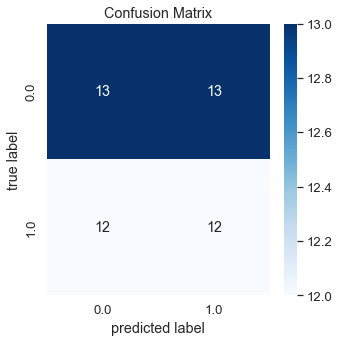

In [73]:
# Check confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Display confusion matrix
y_pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)

def plot_matrix(cm, classes, title):
    ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, fmt='g', cbar=True)
    ax.set(title=title, xlabel="predicted label", ylabel="true label")

plt.figure(figsize = (5,5))
plot_matrix(cm, classes = model.classes_, title = 'Confusion Matrix')